In [1]:
import sys
sys.path.insert(0, "./../../scripts")

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import ricciardi as ric
import dmft

def imshowbar(fig,ax,A,showbar=True,**kwargs):
    imsh = ax.imshow(A,**kwargs)
    if showbar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = fig.colorbar(imsh, cax=cax, orientation="vertical")
        return cbar

In [3]:
plt.rcParams["font.sans-serif"] = ["PT Sans","DejaVu Sans"]

# Plot Mean Response vs Balance Index From Supp Fig S5a

In [4]:
with open("./../../model_data/best_fit.pkl", "rb") as handle:
    res_dict = pickle.load(handle)
prms = res_dict["prms"]
eX = res_dict["best_monk_eX"]
bX = res_dict["best_monk_bX"]
aXs = res_dict["best_monk_aXs"]

ri = ric.Ricciardi()
ri.set_up_nonlinearity("./../../model_data/phi_int")

tau = np.array([ri.tE,ri.tI],dtype=np.float32)
W = prms["J"]*np.array([[1,-prms["gE"]],[1./prms["beta"],-prms["gI"]/prms["beta"]]],dtype=np.float32)
Ks = np.array([prms["K"],prms["K"]/4],dtype=np.float32)
H = bX*prms["K"]*prms["J"]*np.array([prms["hE"],prms["hI"]/prms["beta"]],dtype=np.float32)
eH = eX

muH = tau*H
SigH = (muH*eH)**2

muW = tau[:,None]*W*Ks
SigW = tau[:,None]**2*W**2*Ks

sW = np.array([[prms["SoriE"],prms["SoriI"]],[prms["SoriE"],prms["SoriI"]]],dtype=np.float32)
sW2 = sW**2

Loading previously saved nonlinearity


In [5]:
FE,FI,ME,MI,CE,CI = dmft.base_itp_moments("./../../model_data")
FL,ML,CL = dmft.opto_itp_moments("./../../model_data",prms["L"],prms["CVL"])
    
def base_M(mui,Sigii,out):
    out[0] = ME(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]
    
def base_C(mui,Sigii,Sigij,out):
    out[0] = CE(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]

def opto_M(mui,Sigii,out):
    out[0] = ML(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]
    
def opto_C(mui,Sigii,Sigij,out):
    out[0] = CL(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]

def block_base_M(mui,Sigii,out):
    out[0] = ME(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]
    out[2] = ME(mui[2],Sigii[2])[0]
    out[3] = MI(mui[3],Sigii[3])[0]
    
def block_base_C(mui,Sigii,Sigij,out):
    out[0] = CE(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]
    out[2] = CE(mui[2],Sigii[2],Sigij[2])[0]
    out[3] = CI(mui[3],Sigii[3],Sigij[3])[0]

def block_opto_M(mui,Sigii,out):
    out[0] = ML(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]
    out[2] = ML(mui[2],Sigii[2])[0]
    out[3] = MI(mui[3],Sigii[3])[0]
    
def block_opto_C(mui,Sigii,Sigij,out):
    out[0] = CL(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]
    out[2] = CL(mui[2],Sigii[2],Sigij[2])[0]
    out[3] = CI(mui[3],Sigii[3],Sigij[3])[0]

In [6]:
res_dict_inits = [[None for i in range(7)] for j in range(7)]
res_dict_perts = [[None for i in range(7)] for j in range(7)]

for s_idx in range(7):
    for j_idx in range(7):
        with open("./../../model_data/dmft_vary_ffwidth_{:d}_J_{:d}".format(s_idx,j_idx)+".pkl","rb") as handle:
            this_res_dict = pickle.load(handle)["dmft_res"]
        res_dict_inits[s_idx][j_idx] = {key: this_res_dict[key][:2] for key in ["rb","rm","sr","Crb","Crm","sCr",
                                                                                "mub","mum","Sigb","Sigm"]}
        res_dict_perts[s_idx][j_idx] = {key: this_res_dict[key][2:] for key in ["rb","rm","sr","Crb","Crm","sCr",
                                                                                "mub","mum","Sigb","Sigm"]}

In [7]:
Twrm = 1.2
Tsav = 0.4

widths = 4**(2*np.arange(0,6+1)/6 - 1)
Js = prms["J"]*8**(2*np.arange(0,6+1)/6 - 2/3)
res_dict_decoups = [[None for i in range(7)] for j in range(7)]

for s_idx in range(7):
    width = widths[s_idx]
    for j_idx in range(7):
        # newJ = Js[j_idx]
        
        # this_prms = prms.copy()
        # this_prms["J"] = newJ
        # this_prms["SoriF"] *= width
        # this_prms["baseinp"] = dmft.wrapnormdens(90,this_prms["SoriF"]) / dmft.wrapnormdens(0,this_prms["SoriF"])
        
        # if j_idx < 3:
        #     dt = 0.01/5
        # elif j_idx < 5:
        #     dt = 0.01/8
        # else:
        #     dt = 0.01/10
        # res_dict_decoups[s_idx][j_idx] = dmft.run_decoupled_two_site_dmft(this_prms,bX,aXs[-1]/bX,eX,"./../results",
        #                                                                   ri,Twrm,Tsav,dt,
        #                                                                   struct_dict=res_dict_inits[s_idx][j_idx],
        #                                                                   which="opto",return_full=True)
        # with open("./../../model_data/decoup_resp_s_{:d}_j_{:d}.pkl".format(s_idx,j_idx),"wb") as handle:
        #     pickle.dump(res_dict_decoups[s_idx][j_idx],handle)
        
        # print("Done with s={:d}, j={:d}".format(s_idx,j_idx))
            
        with open("./../../model_data/decoup_resp_s_{:d}_j_{:d}.pkl".format(s_idx,j_idx),"rb") as handle:
            res_dict_decoups[s_idx][j_idx] = pickle.load(handle)

In [8]:
def calc_lin_resp(res_dict_init,res_dict_decoup,prms,Tsav,dt):
    tau = np.array([ri.tE,ri.tI],dtype=np.float32)
    W = prms["J"]*np.array([[1,-prms["gE"]],
                                 [1./prms["beta"],-prms["gI"]/prms["beta"]]],dtype=np.float32)
    Ks = np.array([prms["K"],prms["K"]/4],dtype=np.float32)

    muW = tau[:,None]*W*Ks
    SigW = tau[:,None]**2*W**2*Ks
    
    δrb0 = res_dict_decoup["rb"] - res_dict_init["rb"]
    δrm0 = res_dict_decoup["rm"] - res_dict_init["rm"]
    δCrb0 = res_dict_decoup["Crb"] - res_dict_init["Crb"]
    δCrm0 = res_dict_decoup["Crm"] - res_dict_init["Crm"]
    
    sr = res_dict_init["sr"]
    sCr = res_dict_init["sCr"][:,-1]

    sW = np.array([[prms["SoriE"],prms["SoriI"]],
                   [prms["SoriE"],prms["SoriI"]]],dtype=np.float32)
    sW2 = sW**2
    sWr = np.sqrt(sW2+sr**2)
    sWCr = np.sqrt(sW2+sCr**2)

    muWbb = (1 - dmft.struct_fact(180/2,sWr,sr,180)) * muW
    muWbm = dmft.struct_fact(180/2,sWr,sr,180) * muW
    muWmb = (1 - dmft.struct_fact(0,sWr,sr,180)) * muW
    muWmm = dmft.struct_fact(0,sWr,sr,180) * muW

    SigWbb = (1 - dmft.struct_fact(180/2,sWCr,sCr,180)) * SigW
    SigWbm = dmft.struct_fact(180/2,sWCr,sCr,180) * SigW
    SigWmb = (1 - dmft.struct_fact(0,sWCr,sCr,180)) * SigW
    SigWmm = dmft.struct_fact(0,sWCr,sCr,180) * SigW
    
    block_muW = np.block([
        [muWbb,muWbm],
        [muWmb,muWmm]
    ])
    block_SigW = np.block([
        [SigWbb,SigWbm],
        [SigWmb,SigWmm]
    ])

    NP = 2
    NT = int(np.round(Tsav/dt)+1)
    
    block_mu = np.concatenate([res_dict_decoup["mub"],res_dict_decoup["mum"]])
    block_Sig = np.concatenate([res_dict_decoup["Sigb"],res_dict_decoup["Sigm"]],0)
    
    res_dict_lin_resp = dmft.lin_resp_mats(np.concatenate([tau,tau]),block_muW,block_SigW,
                                        np.zeros(4),np.zeros(4),block_opto_M,block_opto_C,Tsav,dt,
                                        block_mu,block_Sig)

    A = res_dict_lin_resp["A"]
    B = res_dict_lin_resp["B"]
    C = res_dict_lin_resp["C"]
    D = res_dict_lin_resp["D"]
    
    Abb,Abm,Amb,Amm = A[:2,  :2],  A[:2,  2:],  A[2:,  :2],  A[2:,  2:]
    Bbb,Bbm,Bmb,Bmm = B[:2,  :2,:],B[:2,  2:,:],B[2:,  :2,:],B[2:,  2:,:]
    Cbb,Cbm,Cmb,Cmm = C[:2,:,:2],  C[:2,:,2:],  C[2:,:,:2],  C[2:,:,2:]
    Dbb,Dbm,Dmb,Dmm = D[:2,:,:2,:],D[:2,:,2:,:],D[2:,:,:2,:],D[2:,:,2:,:]
    
    Mbb = np.block([[Abb,Bbb.reshape(NP,NP*NT)],[Cbb.reshape(NP*NT,NP),Dbb.reshape(NP*NT,NP*NT)]])
    Mbm = np.block([[Abm,Bbm.reshape(NP,NP*NT)],[Cbm.reshape(NP*NT,NP),Dbm.reshape(NP*NT,NP*NT)]])
    Mmb = np.block([[Amb,Bmb.reshape(NP,NP*NT)],[Cmb.reshape(NP*NT,NP),Dmb.reshape(NP*NT,NP*NT)]])
    Mmm = np.block([[Amm,Bmm.reshape(NP,NP*NT)],[Cmm.reshape(NP*NT,NP),Dmm.reshape(NP*NT,NP*NT)]])
    
    Xbm = -np.linalg.solve(Mbb,Mbm)
    Xmb = -np.linalg.solve(Mmm,Mmb)
    
    Xbm_mint = Xbm.copy()
    Xbm_mint[:2,2:] = 0
    Xmb_mint = Xmb.copy()
    Xmb_mint[:2,2:] = 0

    δmb0 = np.concatenate([δrb0,δCrb0.flatten()])
    δmp0 = np.concatenate([δrm0,δCrm0.flatten()])

    fb = Mbb@δmb0
    fp = Mmm@δmp0

    M = np.block([[Mbb,Mbm],[Mmb,Mmm]])
    f = np.concatenate([fb,fp])
    
    δm = np.concatenate([δmb0,
                         δmp0+Xmb@δmb0])
    δm_mint = np.concatenate([δmb0,
                             δmp0+Xmb_mint@δmb0])

    δmb = δm[:NP+NP*NT]
    δmp = δm[NP+NP*NT:]

    δmb_mint = δm_mint[:NP+NP*NT]
    δmp_mint = δm_mint[NP+NP*NT:]

    δrb = δmb[:NP]
    δCrb = δmb[NP:].reshape(NP,NT)
    δrm = δmp[:NP]
    δCrm = δmp[NP:].reshape(NP,NT)

    δrb_mint = δmb_mint[:NP]
    δCrb_mint = δmb_mint[NP:].reshape(NP,NT)
    δrm_mint = δmp_mint[:NP]
    δCrm_mint = δmp_mint[NP:].reshape(NP,NT)
    
    Wmm = np.eye(NP) - (Amm - Bmm.reshape(NP,NP*NT)@np.linalg.inv(Dmm.reshape(NP*NT,NP*NT))@Cmm.reshape(NP*NT,NP))
    Wbb = np.eye(NP) - (Abb - Bbb.reshape(NP,NP*NT)@np.linalg.inv(Dbb.reshape(NP*NT,NP*NT))@Cbb.reshape(NP*NT,NP))
    Wmb = - (Amb - Bmm.reshape(NP,NP*NT)@np.linalg.inv(Dmm.reshape(NP*NT,NP*NT))@Cmb.reshape(NP*NT,NP))
    Wbm = - (Abm - Bbb.reshape(NP,NP*NT)@np.linalg.inv(Dbb.reshape(NP*NT,NP*NT))@Cbm.reshape(NP*NT,NP))
    
        
    Xmb1 = Wmb/np.linalg.det(np.eye(2)-Wmm)
    Xbm1 = Wbm/np.linalg.det(np.eye(2)-Wbb)
    Xmb2 = Xmb[:2,:2] - Xmb1
    Xbm2 = Xbm[:2,:2] - Xbm1
    
    res_dict = {}
    
    res_dict["drb0"] = δrb0
    res_dict["drm0"] = δrm0
    res_dict["dCrb0"] = δCrb0
    res_dict["dCrm0"] = δCrm0
    res_dict["drb1"] = δrb - δrb0
    res_dict["drm1"] = δrm - δrm0
    res_dict["dCrb1"] = δCrb - δCrb0
    res_dict["dCrm1"] = δCrm - δCrm0
    res_dict["drb1_mint"] = δrb_mint - δrb0
    res_dict["drm1_mint"] = δrm_mint - δrm0
    res_dict["dCrb1_mint"] = δCrb_mint - δCrb0
    res_dict["dCrm1_mint"] = δCrm_mint - δCrm0
    res_dict["drb"] = δrb
    res_dict["drm"] = δrm
    res_dict["dCrb"] = δCrb
    res_dict["dCrm"] = δCrm
    res_dict["drb_mint"] = δrb_mint
    res_dict["drm_mint"] = δrm_mint
    res_dict["dCrb_mint"] = δCrb_mint
    res_dict["dCrm_mint"] = δCrm_mint
    res_dict["Xmb"] = Xmb
    res_dict["Xmb1"] = Xmb1
    res_dict["Xmb2"] = Xmb2
    res_dict["Xbm"] = Xbm
    res_dict["Xbm1"] = Xbm1
    res_dict["Xbm2"] = Xbm2
    res_dict["detAp"] = np.linalg.det(np.eye(2)-Wmm)
    res_dict["detAb"] = np.linalg.det(np.eye(2)-Wbb)
    
    return res_dict

In [9]:
res_dict_lin_resps = [[None for i in range(7)] for j in range(7)]

for s_idx in range(7):
    width = widths[s_idx]
    for j_idx in range(7):
        newJ = Js[j_idx]
        
        this_prms = prms.copy()
        this_prms["J"] = newJ
        this_prms["SoriF"] *= width
        this_prms["baseinp"] = dmft.wrapnormdens(90,this_prms["SoriF"]) / dmft.wrapnormdens(0,this_prms["SoriF"])
        
        if j_idx < 3:
            dt = 0.01/5
        elif j_idx < 5:
            dt = 0.01/8
        else:
            dt = 0.01/10
        
        res_dict_lin_resps[s_idx][j_idx] = calc_lin_resp(res_dict_inits[s_idx][j_idx],
                                                         res_dict_decoups[s_idx][j_idx],
                                                         this_prms,Tsav,dt)
        
        print("Done with s={:d}, j={:d}".format(s_idx,j_idx))

Done with s=0, j=0
Done with s=0, j=1
Done with s=0, j=2
Done with s=0, j=3
Done with s=0, j=4
Done with s=0, j=5
Done with s=0, j=6
Done with s=1, j=0
Done with s=1, j=1
Done with s=1, j=2
Done with s=1, j=3
Done with s=1, j=4
Done with s=1, j=5
Done with s=1, j=6
Done with s=2, j=0
Done with s=2, j=1
Done with s=2, j=2
Done with s=2, j=3
Done with s=2, j=4
Done with s=2, j=5
Done with s=2, j=6
Done with s=3, j=0
Done with s=3, j=1
Done with s=3, j=2
Done with s=3, j=3
Done with s=3, j=4
Done with s=3, j=5
Done with s=3, j=6
Done with s=4, j=0
Done with s=4, j=1
Done with s=4, j=2
Done with s=4, j=3
Done with s=4, j=4
Done with s=4, j=5
Done with s=4, j=6
Done with s=5, j=0
Done with s=5, j=1
Done with s=5, j=2
Done with s=5, j=3
Done with s=5, j=4
Done with s=5, j=5
Done with s=5, j=6
Done with s=6, j=0
Done with s=6, j=1
Done with s=6, j=2
Done with s=6, j=3
Done with s=6, j=4
Done with s=6, j=5
Done with s=6, j=6


In [10]:
J_vsm_dr0 = np.zeros((7,7))
J_osm_dr0 = np.zeros((7,7))
J_vsm_dr1 = np.zeros((7,7))
J_vsm_base_bals = np.zeros((7,7))
J_osm_base_bals = np.zeros((7,7))

def calc_bal(μmuE,μmuI,ΣmuE,ΣmuI,N=10000):
    muEs = np.fmax(μmuE + np.sqrt(ΣmuE)*np.random.randn(N),1e-24)
    muIs = np.fmin(μmuI + np.sqrt(ΣmuI)*np.random.randn(N),-1e-24)
    return np.mean(np.fmax(0,muEs+muIs)/muEs)

for s_idx in range(7):
    for j_idx in range(7):
        J_vsm_dr0[s_idx,j_idx] = 0.8*res_dict_lin_resps[s_idx][j_idx]["drm0"][0] +\
                                 0.2*res_dict_lin_resps[s_idx][j_idx]["drm0"][1]
        J_osm_dr0[s_idx,j_idx] = 0.8*res_dict_lin_resps[s_idx][j_idx]["drb0"][0] +\
                                 0.2*res_dict_lin_resps[s_idx][j_idx]["drb0"][1]
        J_vsm_dr1[s_idx,j_idx] = 0.8*res_dict_lin_resps[s_idx][j_idx]["drm1"][0] +\
                                 0.2*res_dict_lin_resps[s_idx][j_idx]["drm1"][1]
        
        with open("./../../model_data/dmft_vary_ffwidth_{:d}_J_{:d}".format(s_idx,j_idx)+".pkl",'rb') as handle:
            this_res_dict = pickle.load(handle)
        
        this_prms = this_res_dict['prms']
        rX = bX
        cA = aXs[-1]/bX
        eH = eX
        Tsim = 1.0
        
        W = this_prms['J']*np.array([[1,-this_prms['gE']],[1./this_prms['beta'],-this_prms['gI']/this_prms['beta']]],dtype=np.float32)
        Ks = (1-this_prms.get('basefrac',0))*np.array([this_prms['K'],this_prms['K']/4],dtype=np.float32)
        Hb = rX*(1+(1-(1-this_prms.get('basefrac',0))*(1-this_prms.get('baseinp',0)))*cA)*this_prms['K']*this_prms['J']*\
            np.array([this_prms['hE'],this_prms['hI']/this_prms['beta']],dtype=np.float32)
        Hm = rX*(1+                                                         cA)*this_prms['K']*this_prms['J']*\
            np.array([this_prms['hE'],this_prms['hI']/this_prms['beta']],dtype=np.float32)
        sW = np.array([[this_prms['SoriE'],this_prms['SoriI']],[this_prms['SoriE'],this_prms['SoriI']]],dtype=np.float32)
        sH = np.array([this_prms['SoriF'],this_prms['SoriF']],dtype=np.float32)
        
        muW = tau[:,None]*W*Ks
        SigW = tau[:,None]**2*W**2*Ks
        
        sW2 = sW**2
        sH2 = sH**2
        
        muHb = tau*Hb
        muHm = tau*Hm
        smuH2 = sH2
        SigHb = (muHb*eH)**2
        SigHm = (muHm*eH)**2
        sSigH2 = 2*sH2
        
        rvb = this_res_dict['dmft_res']['rb'][:2]
        rvm = this_res_dict['dmft_res']['rm'][:2]
        srv = this_res_dict['dmft_res']['sr'][:2]
        srv2 = this_res_dict['dmft_res']['sr'][:2]**2
        Crvb = dmft.grid_stat(np.mean,this_res_dict['dmft_res']['Crb'][:2],Tsim,dt)
        Crvm = dmft.grid_stat(np.mean,this_res_dict['dmft_res']['Crm'][:2],Tsim,dt)
        sCrv = dmft.grid_stat(np.mean,this_res_dict['dmft_res']['sCr'][:2],Tsim,dt)
        sCrv2 = dmft.grid_stat(np.mean,this_res_dict['dmft_res']['sCr'][:2],Tsim,dt)**2
        
        sWrv2 = sW2+srv2
        sWrv = np.sqrt(sWrv2)
        sWCrv2 = sW2+sCrv2
        sWCrv = np.sqrt(sWCrv2)
    
        muvb = muW*rvb
        muvm = muvb + dmft.struct_fact(0,sWrv,srv)*muW*(rvm-rvb)
        muvb = muvb + dmft.struct_fact(90,sWrv,srv)*muW*(rvm-rvb)
        smuv2 = sWrv**2
        
        Sigvb = SigW*Crvb
        Sigvm = Sigvb + dmft.struct_fact(0,sWCrv,sCrv)*SigW*(Crvm-Crvb)
        Sigvb = Sigvb + dmft.struct_fact(90,sWCrv,sCrv)*SigW*(Crvm-Crvb)
        sSigv2 = sWCrv**2
        
        μmuEms = np.zeros(2)
        μmuEbs = np.zeros(2)
        μmuIms = np.zeros(2)
        μmuIbs = np.zeros(2)
        ΣmuEms = np.zeros(2)
        ΣmuEbs = np.zeros(2)
        ΣmuIms = np.zeros(2)
        ΣmuIbs = np.zeros(2)
    
        for i in range(2):
            μmuEms[i] = muvm[i,0] + muHm[i]
            μmuEbs[i] = muvb[i,0] + muHb[i]
            ΣmuEms[i] = Sigvm[i,0] + SigHm[i]
            ΣmuEbs[i] = Sigvb[i,0] + SigHb[i]
            μmuIms[i] = muvm[i,1]
            μmuIbs[i] = muvb[i,1]
            ΣmuIms[i] = Sigvm[i,1]
            ΣmuIbs[i] = Sigvb[i,1]
        
        J_vsm_base_bals[s_idx,j_idx]  = 0.8*calc_bal(μmuEms[0],
                                                     μmuIms[0],
                                                     ΣmuEms[0],
                                                     ΣmuIms[0]) +\
                                        0.2*calc_bal(μmuEms[1],
                                                     μmuIms[1],
                                                     ΣmuEms[1],
                                                     ΣmuIms[1])
        J_osm_base_bals[s_idx,j_idx]  = 0.8*calc_bal(μmuEbs[0],
                                                     μmuIbs[0],
                                                     ΣmuEbs[0],
                                                     ΣmuIbs[0]) +\
                                        0.2*calc_bal(μmuEbs[1],
                                                     μmuIbs[1],
                                                     ΣmuEbs[1],
                                                     ΣmuIbs[1])

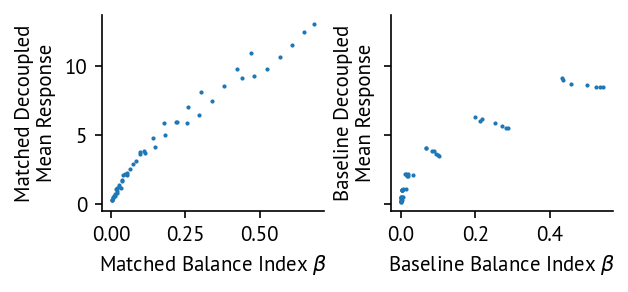

In [11]:
fig,axs = plt.subplots(1,2,figsize=(2.2*2,1.7*1),dpi=150,sharey='row',sharex='col')#,width_ratios=[3,3,4])
fig.subplots_adjust(wspace=0.3)

axs[0].scatter(J_vsm_base_bals.flatten(),J_vsm_dr0.flatten(),s=1)
axs[1].scatter(J_osm_base_bals.flatten(),J_osm_dr0.flatten(),s=1)

for ax in axs.flat:
    ax.spines[['right', 'top']].set_visible(False)
    
axs[0].set_xlabel(r'Matched Balance Index $\beta$')
axs[1].set_xlabel(r'Baseline Balance Index $\beta$')
axs[0].set_ylabel('Matched Decoupled\nMean Response')
axs[1].set_ylabel('Baseline Decoupled\nMean Response')

fig.savefig('./supp_fig_5a.pdf')

# Plot First-Order Linear Response Correction Including Rate Autocorrelation Changes with Varied Structure and Coupling from Supp Fig S5b

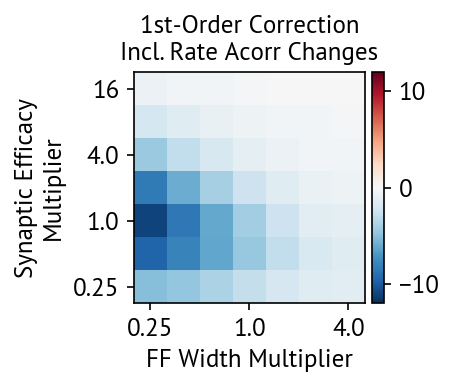

In [12]:
fig,ax = plt.subplots(1,1,figsize=(2.2*1,2.0*1),dpi=150,sharey="row",sharex="col")#,width_ratios=[3,3,4])
fig.subplots_adjust(wspace=0.5,hspace=0.5)

diff_dr1_lim = np.nanmax(np.abs(J_vsm_dr1[:,:].flatten()))

cbar = imshowbar(fig,ax,J_vsm_dr1.T,origin="lower",cmap="RdBu_r",vmin=-12,vmax=12)
cbar.ax.tick_params(labelsize=12)

ax.set_ylabel("Synaptic Efficacy\nMultiplier",fontsize=12)
ax.set_xlabel("FF Width Multiplier",fontsize=12)
ax.set_yticks(np.arange(0,7,2),["0.25","1.0","4.0","16"],fontsize=12)
ax.set_xticks(np.arange(0,7,3),["0.25","1.0","4.0"],fontsize=12)

ax.set_title("1st-Order Correction\nIncl. Rate Acorr Changes",fontsize=12)

# fig.tight_layout()
fig.savefig("./supp_fig_5b.pdf", bbox_inches="tight")